# Introduction (Unit I) - Luisen

## 1.- Import data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [2]:
#Load data from csv and store it in dataframe
data = pd.read_csv("HCV-Egy-Data.csv") #We can change this database

# We show the first 
data.head() # Return the first n rows.

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


## 2.- Data set description - "Hepatitis C Virus (HCV) for Egyptian patients" 

Egyptian patients who underwent treatment dosages for HCV about 18 months. Discretization should be applied based on expert recommendations; there is an attached file shows how.



*Age: Age
*Gender Gender
*BMI Body Mass Index
Fever Fever
Nausea/Vomting Nausea/Vomting
Headache Headache
Diarrhea Diarrhea
Fatigue & generalized bone ache Fatigue & generalized bone ache
Jaundice Jaundice
Epigastric pain Epigastric pain
WBC White blood cell
RBC red blood cells
HGB Hemoglobin
Plat Platelets
AST 1 aspartate transaminase ratio
ALT 1 alanine transaminase ratio 1 week
ALT 4 alanine transaminase ratio 12 weeks
ALT 12 alanine transaminase ratio 4 weeks
ALT 24 alanine transaminase ratio 24 weeks
ALT 36 alanine transaminase ratio 36 weeks
ALT 48 alanine transaminase ratio 48 weeks
ALT after 24 w alanine transaminase ratio 24 weeks
RNA Base RNA Base
RNA 4 RNA 4
RNA 12 RNA 12
RNA EOT RNA end-of-treatment
RNA EF RNA Elongation Factor
Baseline histological Grading Baseline histological Grading
Baselinehistological staging Baselinehistological staging

#### a) We indicate the type each variable is (numerical, categorical, etc.).

In [3]:
data.dtypes

Age                                 int64
Gender                              int64
BMI                                 int64
Fever                               int64
Nausea/Vomting                      int64
Headache                            int64
Diarrhea                            int64
Fatigue & generalized bone ache     int64
Jaundice                            int64
Epigastric pain                     int64
WBC                                 int64
RBC                                 int64
HGB                                 int64
Plat                                int64
AST 1                               int64
ALT 1                               int64
ALT4                                int64
ALT 12                              int64
ALT 24                              int64
ALT 36                              int64
ALT 48                              int64
ALT after 24 w                      int64
RNA Base                            int64
RNA 4                             

#### b) Columns name

In [4]:
data.columns

Index(['Age ', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging'],
      dtype='object')

#### c) Removing column blank spaces

In [5]:
data.columns = data.columns.str.replace(' ', '')
data.columns

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue&generalizedboneache', 'Jaundice', 'Epigastricpain',
       'WBC', 'RBC', 'HGB', 'Plat', 'AST1', 'ALT1', 'ALT4', 'ALT12', 'ALT24',
       'ALT36', 'ALT48', 'ALTafter24w', 'RNABase', 'RNA4', 'RNA12', 'RNAEOT',
       'RNAEF', 'BaselinehistologicalGrading', 'Baselinehistologicalstaging'],
      dtype='object')

#### d) Adding two categorical variables (from 'Baselinehistologicalstaging')
The new variable 'Outcome' indicates whether the patient has Cirrhosis or not (1 or 0) and 'Histologicalstaging' that indicates the histological stage of the disease.

In [6]:
category=pd.cut(data.Baselinehistologicalstaging, right=False
                ,bins=[0,1,2,3,4,5],labels=['NoFibrosis','PortalFibrosis','FewSepta','ManySepta','Cirrhosis'])
data.insert(29,'Histologicalstaging', category)
data.columns

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue&generalizedboneache', 'Jaundice', 'Epigastricpain',
       'WBC', 'RBC', 'HGB', 'Plat', 'AST1', 'ALT1', 'ALT4', 'ALT12', 'ALT24',
       'ALT36', 'ALT48', 'ALTafter24w', 'RNABase', 'RNA4', 'RNA12', 'RNAEOT',
       'RNAEF', 'BaselinehistologicalGrading', 'Baselinehistologicalstaging',
       'Histologicalstaging'],
      dtype='object')

In [7]:
new_var= np.where((data['Baselinehistologicalstaging'] < 4), 0,1)
data.insert(30,'Outcome', new_var) # In the 8th position.
data.columns

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue&generalizedboneache', 'Jaundice', 'Epigastricpain',
       'WBC', 'RBC', 'HGB', 'Plat', 'AST1', 'ALT1', 'ALT4', 'ALT12', 'ALT24',
       'ALT36', 'ALT48', 'ALTafter24w', 'RNABase', 'RNA4', 'RNA12', 'RNAEOT',
       'RNAEF', 'BaselinehistologicalGrading', 'Baselinehistologicalstaging',
       'Histologicalstaging', 'Outcome'],
      dtype='object')

In [8]:
data.dtypes

Age                               int64
Gender                            int64
BMI                               int64
Fever                             int64
Nausea/Vomting                    int64
Headache                          int64
Diarrhea                          int64
Fatigue&generalizedboneache       int64
Jaundice                          int64
Epigastricpain                    int64
WBC                               int64
RBC                               int64
HGB                               int64
Plat                              int64
AST1                              int64
ALT1                              int64
ALT4                              int64
ALT12                             int64
ALT24                             int64
ALT36                             int64
ALT48                             int64
ALTafter24w                       int64
RNABase                           int64
RNA4                              int64
RNA12                             int64


In [9]:
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue&generalizedboneache,Jaundice,Epigastricpain,...,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF,BaselinehistologicalGrading,Baselinehistologicalstaging,Histologicalstaging,Outcome
0,56,1,35,2,1,1,1,2,2,2,...,5,655330,634536,288194,5,5,13,2,FewSepta,0
1,46,1,29,1,2,2,1,2,2,1,...,44,40620,538635,637056,336804,31085,4,2,FewSepta,0
2,57,1,33,2,2,2,2,1,1,1,...,5,571148,661346,5,735945,558829,4,4,Cirrhosis,1
3,49,2,33,1,2,1,2,1,2,1,...,33,1041941,449939,585688,744463,582301,10,3,ManySepta,0
4,59,1,32,1,1,2,1,2,2,2,...,30,660410,738756,3731527,338946,242861,11,1,PortalFibrosis,0


## 3.- Descriptive Statistical Analysis

In [10]:
# Describe data
data.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue&generalizedboneache,Jaundice,Epigastricpain,...,ALT48,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF,BaselinehistologicalGrading,Baselinehistologicalstaging,Outcome
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462,0.261372
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392,0.439541
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000,0.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000,0.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000,0.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000,1.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000,1.000000


In [11]:
data.describe(include='all') #For categorical data.

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue&generalizedboneache,Jaundice,Epigastricpain,...,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF,BaselinehistologicalGrading,Baselinehistologicalstaging,Histologicalstaging,Outcome
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000,1385,1385.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cirrhosis,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,362,NaN
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462,NaN,0.261372
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392,NaN,0.439541
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000,NaN,0.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000,NaN,0.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000,NaN,0.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000,NaN,1.000000


In [12]:
# Number of entries in the dataset:
print(data.shape)

(1385, 31)


In [13]:
# Total number of unique values per variable
print(data.nunique())

Age                              30
Gender                            2
BMI                              14
Fever                             2
Nausea/Vomting                    2
Headache                          2
Diarrhea                          2
Fatigue&generalizedboneache       2
Jaundice                          2
Epigastricpain                    2
WBC                            1305
RBC                            1384
HGB                               6
Plat                           1375
AST1                             90
ALT1                             90
ALT4                             90
ALT12                            90
ALT24                            90
ALT36                            91
ALT48                            91
ALTafter24w                      25
RNABase                        1384
RNA4                           1384
RNA12                          1001
RNAEOT                         1002
RNAEF                          1004
BaselinehistologicalGrading 

In [14]:
data["BaselinehistologicalGrading"].value_counts() 

15    139
11    121
14    106
9     103
6     102
12    101
8      97
13     95
4      94
5      93
3      89
10     87
16     86
7      72
Name: BaselinehistologicalGrading, dtype: int64

In [15]:
data["Histologicalstaging"].value_counts() 

Cirrhosis         362
ManySepta         355
PortalFibrosis    336
FewSepta          332
NoFibrosis          0
Name: Histologicalstaging, dtype: int64

In [16]:
data["Outcome"].value_counts() 

0    1023
1     362
Name: Outcome, dtype: int64

## 4.- Analyzing Feature Patterns using Visualization

#### a) Visualize the histograms of the variables in the database, choosing a number of intervals suitable for each variable. Justify this choice.

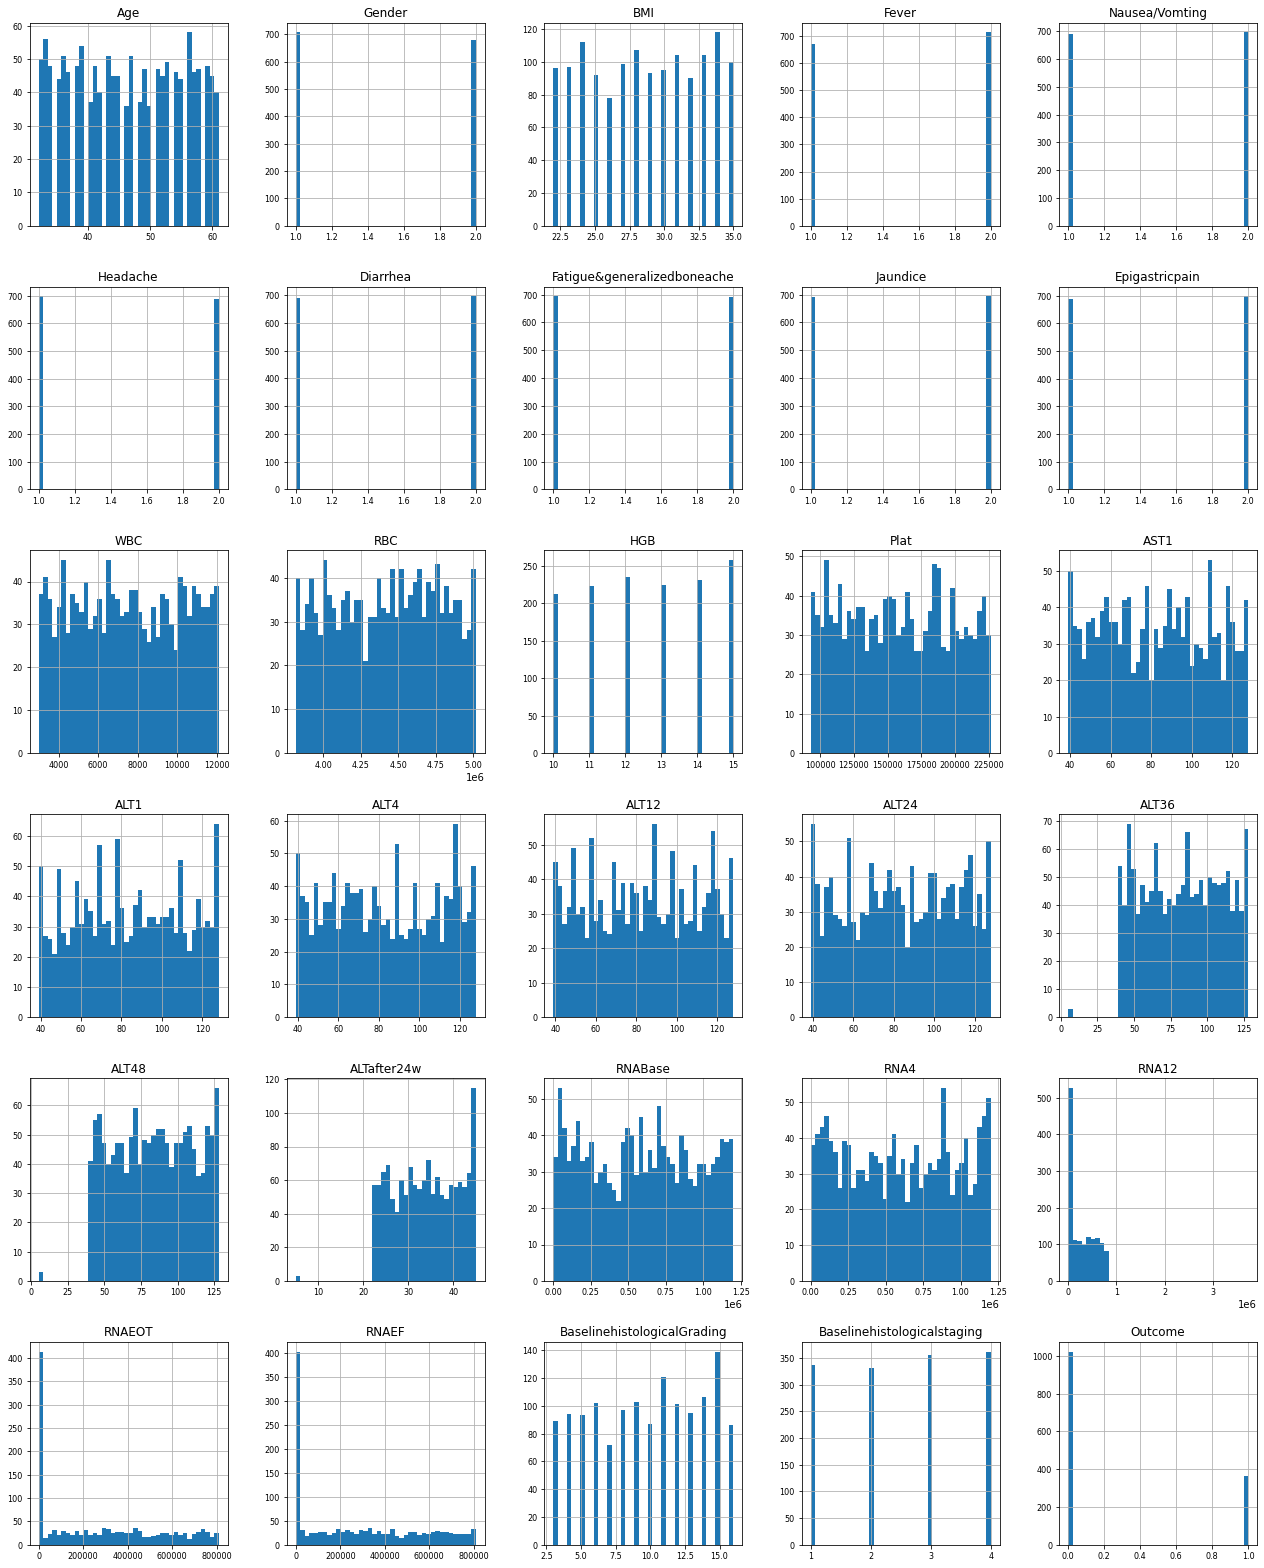

In [17]:
data.hist(figsize=(22, 28), bins=40, xlabelsize=8, ylabelsize=8); 

##  12.-  Training, validation and test sets

The available cases will be now separated into two subsets, without sharing any case in common:

- Training subset
- Test subset

The training subset will be used for the learning of some models. And the test subset will be used lately to estimate the final performance.

For the separation into subsets, the following issues have been taken into account:

##### a) What percentage of available cases will you consider in the training subset? And in the test subset?

Training set (75%)

Test set (25%)

##### b) Consider that you build a binary classifier (two classes, C1 and C2). Discuss what would happen when evaluating the classifier's performance if the training subset with which the classifier is designed had almost all the cases of class C1 and the test subset had almost all the cases of class C2.

This would mean that the distribution of the datasets was not done in a balanced way, so the final performance of the predictive model will not work properly.

##### c) How could you avoid overtraining in the design of the classifier? What would be the process to be followed to find the best parameters of that model?

To avoid overtraining in the design of the classifier, the training set is divided again into training set and validation set, but before that, part of the dataset should be divided as X data (containing almost all of the variables) and Y data (containing the output). And the process to find the best paramets will be the cross-validation or grid search techniques within the subsets previously mentioned.

##### e) Discuss what you should do with the original data set if you find that the distribution of the test subset cases is different from the distribution of the training subset.

In that case, the solution will be to use a Stratified K-fold validation, which is a variation of the classifier where each set contains approximately the same percentage of samples for each class.

## Training:

In [18]:
#Create input and output data


c = list(data.columns)
c.remove('Histologicalstaging') #Remove the categorical values

x = data[c]
y = data['Outcome']

x.shape, y.shape

((1385, 30), (1385,))

In [19]:
# Split the data set in two different subsets: training and test
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

x, y = shuffle(x,y, random_state=0)      # The random state is used to obtain always ths same partition
X_train, X_test, Y_train, Y_test = train_test_split(x, y,random_state=0) # By default 75% and 25%

In [20]:
# Normalize variables
# IMPORTANT!! You will use the mean and the standard desviation of the training set, to normalize the test set
# In a real scenario, you don't know the test set in advance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [21]:
from sklearn import svm

#clf = svm.SVC(kernel='linear', C=1).fit(X_train, Y_train)
#clf.score(X_test, Y_test)

In [22]:
#X_train.shape

## Validation:

It can be considered multiple 

## 7.- Dealing with outliers - Luis

##### a) Indicate which variables present anomalous values that could be eliminated and justify how you have identified them.

Histograms: thanks to the histograms, we can observe that the following variables have anomalous values that do not match the general behavior of the data.

- ALT36
- ALT48
- ALTafter24w
- RNA12

Boxplots: With this method, we will be able to only see the most outstanding outliers that are extremely far from the other values. Analyzing the boxplots of each of the variables, we can confirm that the following variables present relevant outliers.

- ALTafter24w
- RNA12



##### a) Identifying outliers with Histograms

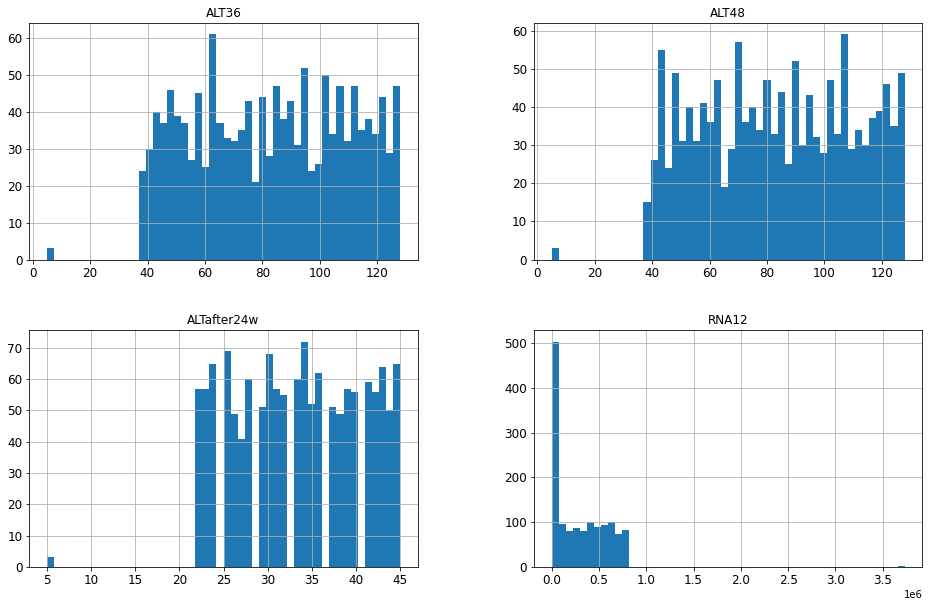

In [23]:
# Thanks to the histograms, we can observe that the following variables have anomalous values 
# that do not match the general behavior of the data.

data.hist(column=['ALT36', 'ALT48', 'ALTafter24w', 'RNA12'], figsize=(16, 10),
                   bins=50, xlabelsize=12, ylabelsize=12);

##### b) Identifying outliers with Boxplots

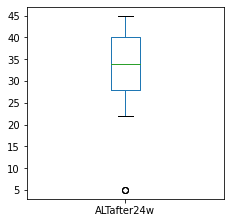

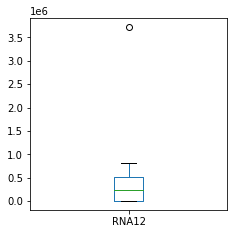

In [24]:
# With this method, we will be able to only see the most outstanding outliers that are extremely far 
# from the other values. Analyzing the boxplots of each of the variables, 
# we can confirm that the following variables present relevant outliers.

data['ALTafter24w'].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,12))
plt.show() # FUSIONAR ESTAS DOS LINEAS

data['RNA12'].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,12))
plt.show()

#### c) Identifying Outliers with Interquartile Range

In [25]:
# Define the Quartiles and calculate the IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [26]:
def outliers_iqr(headers):
    
    for header in headers:
        
        # Calculate the bounds
        lower_bound = Q1[header]-(1.5*IQR[header])
        upper_bound = Q1[header]+(1.5*IQR[header])
        
        # Identify the outliers below and above the bounds
        out1 = data[header].loc[data[header] < lower_bound].tolist()
        out2 = data[header].loc[data[header] > upper_bound].tolist()
        
        print()
        print(header.upper())
        
        print('Lower outliers:')
        print(out1)
        
        print('Upper outliers:')
        print(out2)
        

In [27]:
headers = ['ALTafter24w', 'RNA12']
outliers_iqr(headers)


ALTAFTER24W
Lower outliers:
[5, 5, 5]
Upper outliers:
[]

RNA12
Lower outliers:
[]
Upper outliers:
[3731527, 787295, 789780, 787815, 798150, 794351, 793752, 787605, 798117, 797451, 805218, 798485, 809245, 801981, 798990, 787967, 798473, 793701, 805636, 798534, 796911, 798772, 791212, 810028, 793474, 797895, 798555, 797579, 803685, 795047, 794687, 802517, 793719, 789173, 806651, 806109]


In [28]:
# The special case of RNA12

# As we can observe in the Boxplot made in a), the interquarantile range (IQR) of RNA12
# is closer to the minimum value of the whole dataset. Thus, identifying outliers with this method 
# is not advisable in this case, because we will interpret the values above the Upper Quartile (Q3)
# that are closer to the maximum value of the dataset as outliers,
# while those values are still within the normal range of the dataset.

# That is the reason why we can observe so many outliers for RNA12 using this method.

#### d) Identifying and eliminating outliers with zscore

In [29]:
import pandas as pd
from scipy import stats

# Z-score will be used for each sample on the data set
z_scores = stats.zscore(data['BMI'])

# It is going to be considered 3 times the standard desviation
abs_z_scores = np.abs(z_scores)
no_outliers = (abs_z_scores < 3)
new_data = data[no_outliers]

def outliers_zscore(headers):
    
    for header in headers:
        
        # Identify outliers
        z_scores1 = stats.zscore(data[header])
        abs_z_scores1 = np.abs(z_scores1)
        outliers1 = (abs_z_scores1 > 2)

        # Boxplot and mean with outliers
        print()
        print(header.upper())
        print(np.where(outliers1)[0]) # Print the positions of the outliers
        print()
        print('Mean with outliers:')
        print(data[header].mean())
        print()

        plt.figure(figsize = (12,4))
        ax1 = plt.subplot(1,2,1)
        ax1.boxplot(data[header])
        ax1.set_title('Boxplot' + header + ' with outliers ')

        # Boxplot and mean without outliers
        print('Mean without outliers:')
        outl = ~(outliers1) #Invert the boolean array of outliers
        mean = data[header].iloc[outl.tolist()].mean() # Calculate the mean without the outliers
        print(mean)

        # We are considering that the outliers are samples of the dataset that belong to erroneous data. 
        # Thus, we are not taking into account those values for the calculation of the mean of the variable.

        # Replacing the outliers for the mean value
        data[header] = data[header].where(~(outliers1), mean)
        
        ax2 = plt.subplot(1,2,2)
        ax2.boxplot(data[header])
        ax2.set_title('Boxplot' + header + ' without outliers ')
        plt.show()
        plt.show()
        


ALT36
[  0   2 457]

Mean with outliers:
83.11768953068592

Mean without outliers:
83.28726483357453


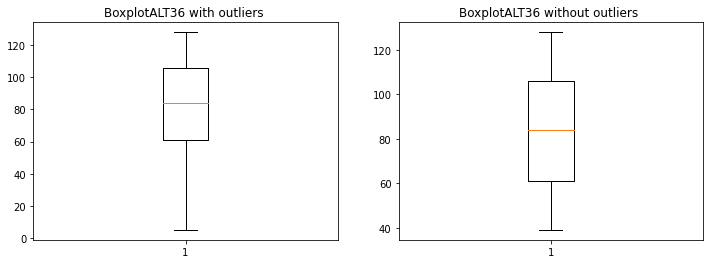


ALT48
[  0   2 457]

Mean with outliers:
83.62960288808664

Mean without outliers:
83.80028943560058


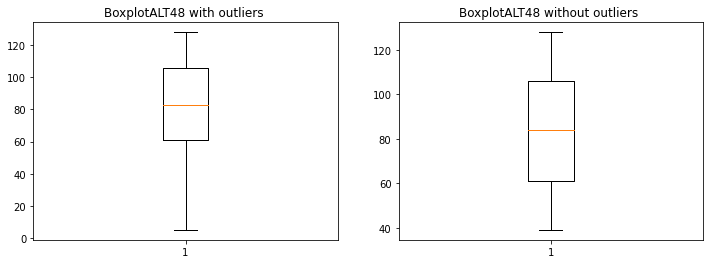


ALTAFTER24W
[  0   2 457]

Mean with outliers:
33.43826714801444

Mean without outliers:
33.5


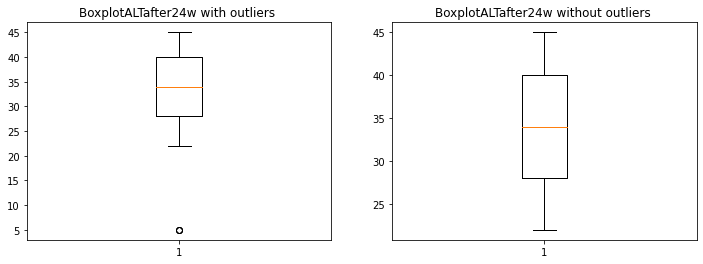


RNA12
[4]

Mean with outliers:
288753.61227436824

Mean without outliers:
286266.0592485549


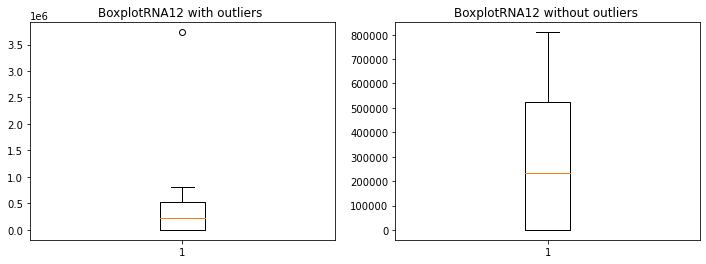

In [30]:
headers = ['ALT36', 'ALT48', 'ALTafter24w', 'RNA12']
outliers_zscore(headers)

## 8.- Dealing with imbalance classes - Luis
This occurs when the number of samples in one class is much higher than the number of samples in the another class. 

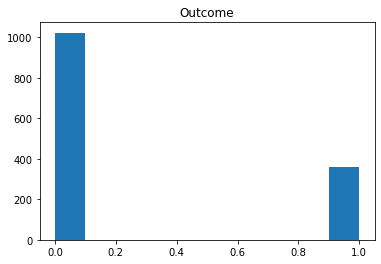

In [31]:
# The variable 'Outcome' indicates whether the patient has Cirrhosis or not (1 or 0)

plt.hist(data['Outcome'])
plt.title('Outcome')
plt.show()

#### a) Random Oversampling 
Randomly duplicate examples in the minority class.

Counter({0: 1023, 1: 1023})


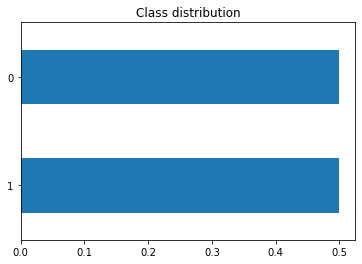

In [36]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Define Oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# Fit and apply the transform
X_over, y_over = oversample.fit_resample(data[data.columns.difference(['Outcome','col'])],data.loc[:,'Outcome'])

# Summarize the new class distribution
class_distribution = pd.Series(y_over).value_counts(normalize=True)
ax = class_distribution.plot.barh()
ax.set_title("Class distribution")

print(Counter(y_over))

In [ ]:
# Falta missing values

# Falta Normalizacion y Training
# Training aun no se del todo como hacerlo